# 1) a. Fetching data

In [1]:
data=open ("C:\\Users\milon\Desktop\powerplant.xlsx")

In [2]:
print(data)

<_io.TextIOWrapper name='C:\\Users\\milon\\Desktop\\powerplant.xlsx' mode='r' encoding='cp1252'>


In [3]:
import pandas as pd
d1 = pd.read_excel("C:\\Users\milon\Desktop\powerplant.xlsx", 'Sheet2', index_col=None)
d1.to_csv('csvfile.csv', encoding='utf-8')

In [4]:
type(d1)

pandas.core.frame.DataFrame

# b) Exploring the data

In [5]:
print("Size of the dataframe containing the combined cylce power plant dataset is",d1.size)
print("This is the number of rows times the number of columns")

Size of the dataframe containing the combined cylce power plant dataset is 47840
This is the number of rows times the number of columns


In [6]:
size=d1.shape
print(size)

(9568, 5)


In [7]:
rows=d1.shape[0]
print("Number of rows = ",rows)
cols=d1.shape[1]
print("Number of columns = ",cols)

Number of rows =  9568
Number of columns =  5


In [8]:
print("The columns are:")
print(list(d1.columns.values))
print("AT represents-Temperature (T) in the range 1.81°C and 37.11°C\nV represents-Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg")
print("AP represents-Ambient Pressure (AP) in the range 992.89-1033.30 milibar")
print("RH represents-Relative Humidity (RH) in the range 25.56% to 100.16%")
print("PE represents- Net hourly electrical energy output (EP) 420.26-495.76 MW")
print("The rows represent data points collected from a Combined Cycle Power Plant over 6 years when the power plant was set to work with full load")

The columns are:
['AT', 'V', 'AP', 'RH', 'PE']
AT represents-Temperature (T) in the range 1.81°C and 37.11°C
V represents-Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
AP represents-Ambient Pressure (AP) in the range 992.89-1033.30 milibar
RH represents-Relative Humidity (RH) in the range 25.56% to 100.16%
PE represents- Net hourly electrical energy output (EP) 420.26-495.76 MW
The rows represent data points collected from a Combined Cycle Power Plant over 6 years when the power plant was set to work with full load


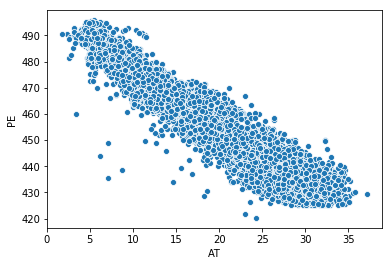

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
a=sns.scatterplot(x="AT",y="PE",data=d1)
a

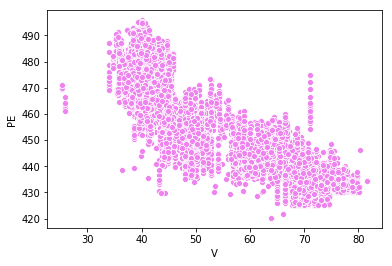

In [12]:
b=sns.scatterplot(x="V",y="PE",data=d1,color="violet")

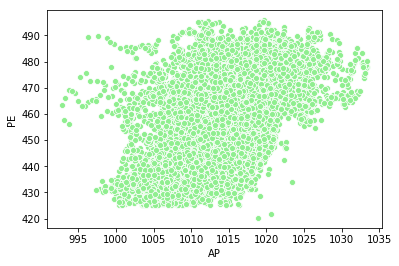

In [13]:
c=sns.scatterplot(x="AP",y="PE",data=d1,color="lightgreen")

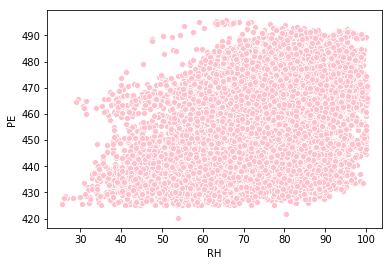

In [14]:
d=sns.scatterplot(x="RH",y="PE",data=d1,color="pink")

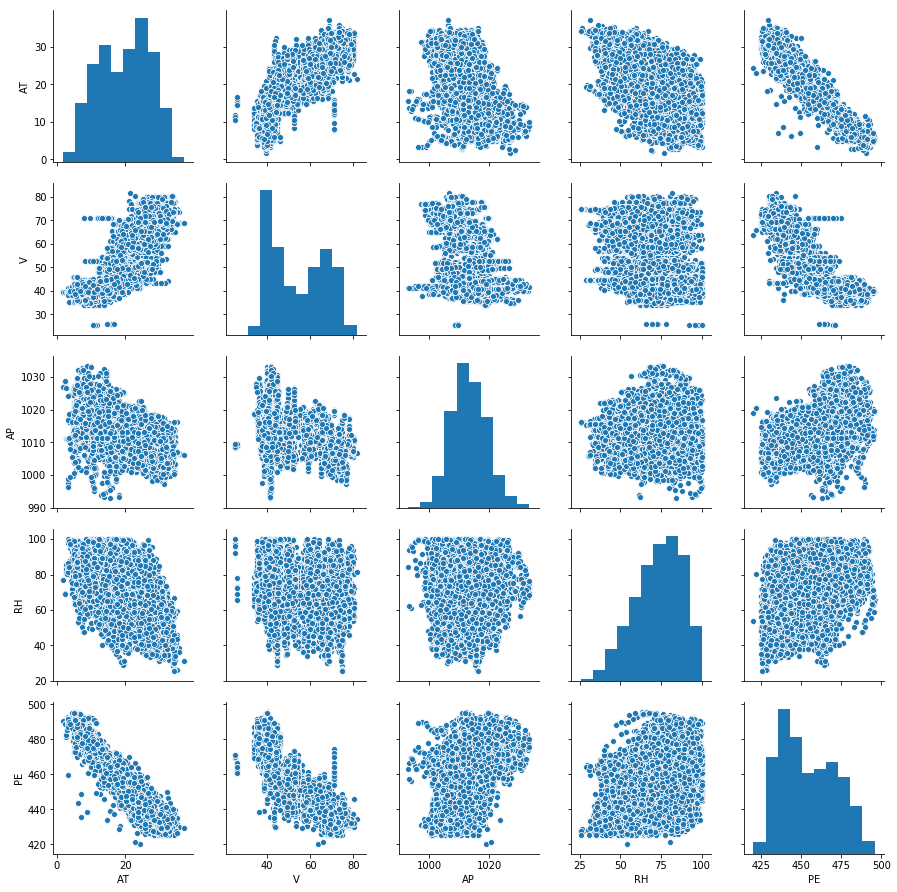

In [15]:
g=sns.pairplot(d1)

# Inference from Scatter Plots
## For AT, the scatter plot depicts a Linear relationship between AT and PE
## For V, the scatter plot depicts a Non-Linear relationship between V and PE, showing a weak relation between the features
## For AP, the scatter plot depicts a Non-Linear relationship between AP and PE, showing a weak relation between the features
## For RH, the scatter plot depicts a Non-Linear relationship between RH and PE, showing a weak relation between the features

In [16]:
print("AT")
print(d1["AT"].describe())
Q1 = d1['AT'].quantile(0.25)
Q3 = d1['AT'].quantile(0.75)
print(Q3 - Q1,"\n")
print("V")
print(d1["V"].describe())
Q1 = d1['V'].quantile(0.25)
Q3 = d1['V'].quantile(0.75)
print(Q3 - Q1,"\n")
print("AP")
print(d1["AP"].describe())
Q1 = d1['AP'].quantile(0.25)
Q3 = d1['AP'].quantile(0.75)
print(Q3 - Q1,"\n")
print("RH")
print(d1["RH"].describe())
Q1 = d1['RH'].quantile(0.25)
Q3 = d1['RH'].quantile(0.75)
print(Q3 - Q1,"\n")
print("PE")
print(d1["PE"].describe())
Q1 = d1['PE'].quantile(0.25)
Q3 = d1['PE'].quantile(0.75)
print(Q3 - Q1,"\n")


AT
count    9568.000000
mean       19.651231
std         7.452473
min         1.810000
25%        13.510000
50%        20.345000
75%        25.720000
max        37.110000
Name: AT, dtype: float64
12.209999999999999 

V
count    9568.000000
mean       54.305804
std        12.707893
min        25.360000
25%        41.740000
50%        52.080000
75%        66.540000
max        81.560000
Name: V, dtype: float64
24.800000000000004 

AP
count    9568.000000
mean     1013.259078
std         5.938784
min       992.890000
25%      1009.100000
50%      1012.940000
75%      1017.260000
max      1033.300000
Name: AP, dtype: float64
8.159999999999968 

RH
count    9568.000000
mean       73.308978
std        14.600269
min        25.560000
25%        63.327500
50%        74.975000
75%        84.830000
max       100.160000
Name: RH, dtype: float64
21.502499999999998 

PE
count    9568.000000
mean      454.365009
std        17.066995
min       420.260000
25%       439.750000
50%       451.550000
75%   

In [17]:
from astropy.table import Table, Column
data_rows=[('AT',19.651,20.345,35.3,13.51,25.72,12.209),
          ('V',54.305,52.08,56.2,41.74,66.54,24.80),
          ('AP',1013.259,1012.94,40.41,1009.10,1017.26,8.159),
          ('RH',73.308,74.975,74.6,63.3275,84.83,21.502),
          ('PE',454.365,451.55,75.5,439.750,468.430,28.680)]
t=Table(rows=data_rows, names=('VARIABLE','  MEAN','  MEDIAN',' RANGE','FIRST QUARTILE','THIRD QUARTILE','IQR'))
print(t)

d1.describe()

VARIABLE    MEAN    MEDIAN  RANGE FIRST QUARTILE THIRD QUARTILE  IQR  
-------- -------- -------- ------ -------------- -------------- ------
      AT   19.651   20.345   35.3          13.51          25.72 12.209
       V   54.305    52.08   56.2          41.74          66.54   24.8
      AP 1013.259  1012.94  40.41         1009.1        1017.26  8.159
      RH   73.308   74.975   74.6        63.3275          84.83 21.502
      PE  454.365   451.55   75.5         439.75         468.43  28.68


,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# c) For each predictor, fit a simple linear regression model to predict the response.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
#Making dataframes for all predictors and response ie pe

at=d1.drop(d1.columns[[1,2,3,4]],axis=1)
#print(at)
v=d1.drop(d1.columns[[0,2,3,4]],axis=1)
#print((v))
ap=d1.drop(d1.columns[[0,1,3,4]],axis=1)
rh=d1.drop(d1.columns[[0,1,2,4]],axis=1)
pe=d1.drop(d1.columns[[0,1,2,3]],axis=1)
#print(pe)

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [21]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Predictor AT

Intercept    497.03412
AT            -2.17132
dtype: float64
For AT vs PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:35:22   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

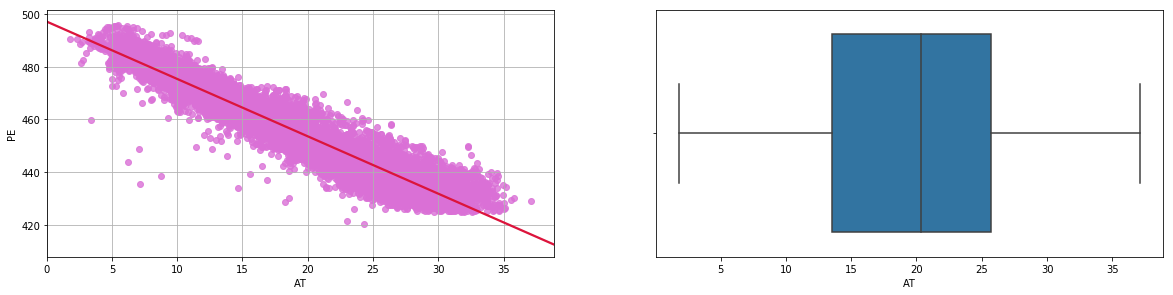

In [23]:
import seaborn as sns
model=smf.ols(formula='PE ~ AT',data=d1)
output=model.fit()
print(output.params)
print("For AT vs PE")
print(output.summary())
plt.figure(figsize=[20,10])
print("AT has no outliers, so we need not remove anything")
plt.subplot(2,2,1)
scat1=sns.regplot(x="AT",y="PE",order=1,data=d1,scatter_kws={"color": "orchid"},line_kws={"color": "crimson"})
scat1.grid()
plt.subplot(2,2,2)
b1=sns.boxplot(d1["AT"]) 


# R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
## For AT, we obtain an R-squared of 89.9%, which shows that there is a high relation between the predictor and output ie PE and most of the data is accurately fitted.The P values are 0.0 showing a statistical significance.

# Predictor V

For V vs PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:35:32   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.

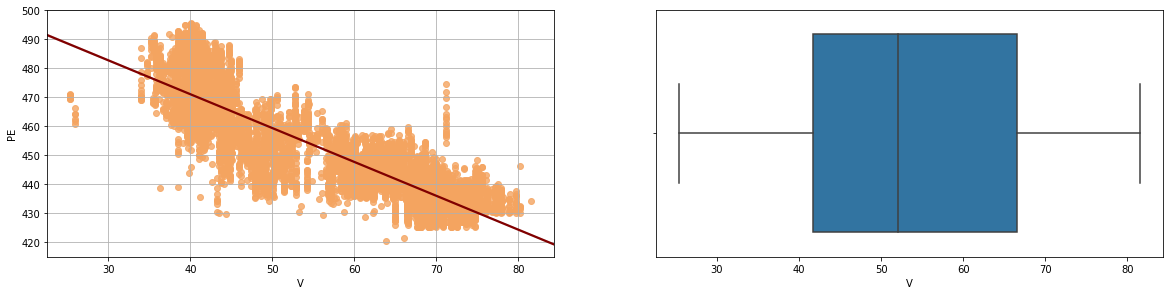

In [24]:
import matplotlib.pyplot as plt
model=smf.ols(formula='PE ~ V',data=d1)
output=model.fit()
output.params
print("For V vs PE")
plt.figure(figsize=[20,10])

print(output.summary())
plt.subplot(2,2,1)
scat1=sns.regplot(x="V",y="PE",order=1,data=d1,scatter_kws={"color": "sandybrown"},line_kws={"color": "maroon"})
scat1.grid()
plt.subplot(2,2,2)
b2=sns.boxplot(d1["V"])
print("V has no outliers, so we need not remove anything")

## For V, we obtain an R-squared of 75.7%, which shows that there is a good relation between the predictor and output ie PE,but not as high as AT.The P values are 0.0 showing a statistical significance

# Predictor AP

For AP vs PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:35:42   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41

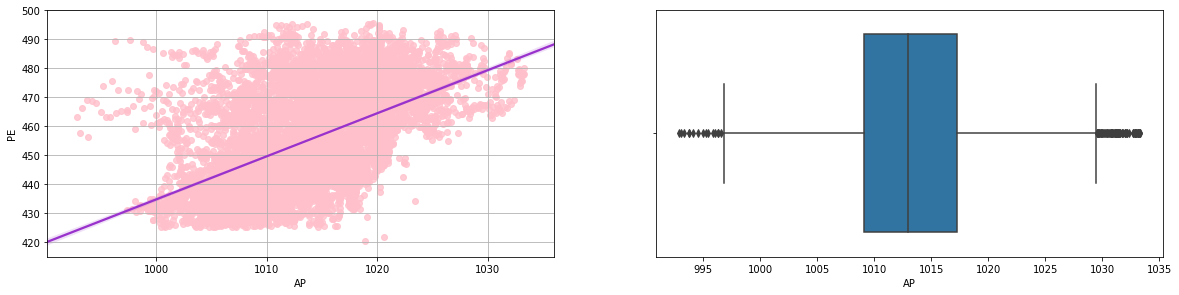

In [25]:
model=smf.ols(formula='PE ~ AP',data=d1)
output=model.fit()
output.params
print("For AP vs PE")
print(output.summary())
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
scat1=sns.regplot(x="AP",y="PE",order=1,data=d1,scatter_kws={"color": "pink"},line_kws={"color": "darkorchid"})
scat1.grid()
plt.subplot(2,2,2)
b2=sns.boxplot(d1["AP"])
print("AP has no outliers, so we can remove them")

## For AP, we obtain an R-squared of 26.9%, which shows that there is a weak relation between the predictor and output ie PE.The P values are 0.0 so it is statistically significant.

# Predictor RH

For RH vs PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:35:47   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511

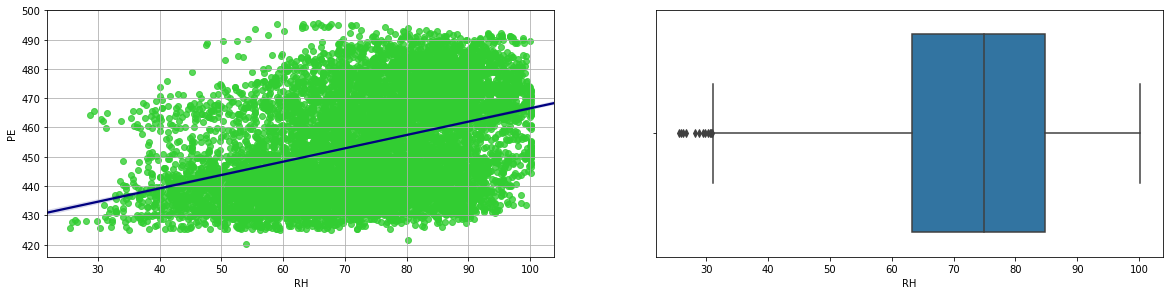

In [26]:
import matplotlib.pyplot as plt
model=smf.ols(formula='PE ~ RH',data=d1)
output=model.fit()
output.params
print("For RH vs PE")
print(output.summary())
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
scat1=sns.regplot(x="RH",y="PE",order=1,data=d1,scatter_kws={"color": "limegreen"},line_kws={"color": "navy"})
scat1.grid()
plt.subplot(2,2,2)
b4=sns.boxplot(d1["RH"])
print("RH has some outliers shown on the left side of the box")

## For RH, we obtain an R-squared of 15.2%, which shows that there is a poor relation between the predictor and output ie PE,the least amongst all the predictors.The P values are 0.0,showing that it is statistically significant.

# d) Multiple regression model

In [26]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model=smf.ols(formula='PE~ AT+V+AP+RH',data=d1)
output=model.fit()
output.params
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        21:44:57   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

## For Mutiple Regression, we get an R-squared of 92.9%. All the P-values for the predictors are 0.0 which show that they are statistically significant in the model. For all predictors the Null Hypothesis can be rejected.

# e) Coefficient in a simple linear regression model is shown on the x-axis, and coefficient estimate in the multiple linear regression model is shown on the y-axis

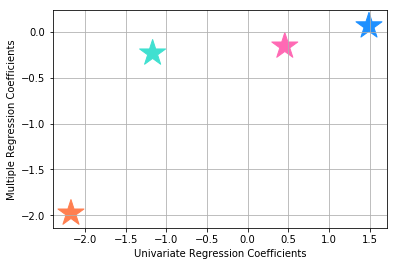

In [27]:
import matplotlib.pyplot as plt
uni=[-2.1713,-1.1681,1.4899,0.4557]
multi=[-1.9775, -0.2339,0.0621,-0.1581]
colors=["coral","turquoise","dodgerblue","hotpink"]
plt.scatter(uni,multi,c=colors,s=750,marker="*")
plt.xlabel("Univariate Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.grid()

# f) Is there evidence of nonlinear association between any of the predictors and the response?
# AT

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:39:15   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

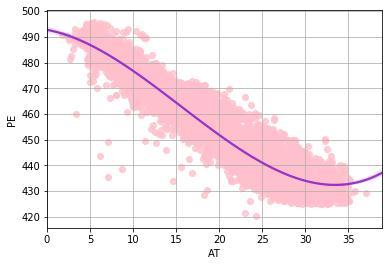

In [28]:
import seaborn as sns
scat1=sns.regplot(x="AT",y="PE",order=3,data=d1,scatter_kws={"color": "pink"},line_kws={"color": "darkorchid"})
scat1.grid(True)
plt.xlabel("AT")
plt.ylabel("PE")
reg1=smf.ols('PE~AT+I(AT ** 2)+I(AT ** 3)',data=d1).fit()
print(reg1.summary())

## R-squared is 91.2%, and P-values for all terms is 0.0 showing statistical significance

# V

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:39:23   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

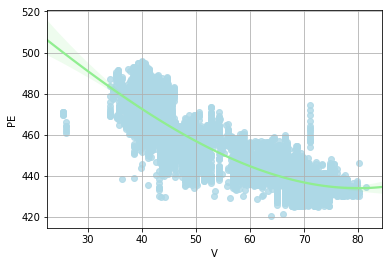

In [29]:
import seaborn as sns
scat1=sns.regplot(x="V",y="PE",order=3,data=d1,scatter_kws={"color": "lightblue"},line_kws={"color": "lightgreen"})
scat1.grid(True)
plt.xlabel("V")
plt.ylabel("PE")
reg1=smf.ols('PE~V+I(V ** 2)+I(V ** 3)',data=d1).fit()
print(reg1.summary())

## R-squared is 77.5%, and P-values for $V^2$ is 0.768 which is greater than 0.05 showing that it is statistically insignificant to the model

# AP

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:39:32   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

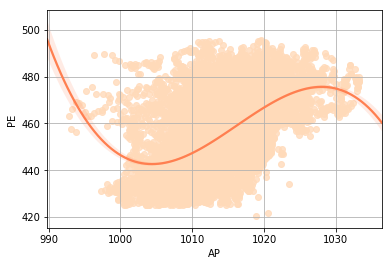

In [30]:
import seaborn as sns
scat1=sns.regplot(x="AP",y="PE",order=3,data=d1,scatter_kws={"color": "peachpuff"},line_kws={"color": "coral"})
scat1.grid(True)
plt.xlabel("AP")
plt.ylabel("PE")
reg1=smf.ols('PE~AP+I(AP ** 2)+I(AP ** 3)',data=d1).fit()
print(reg1.summary())

## R-squared is 27.5%, and P-values for all terms is 0.0 showing statistical significance but the R-squared is lesser than that for AT and V

# RH

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:39:39   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

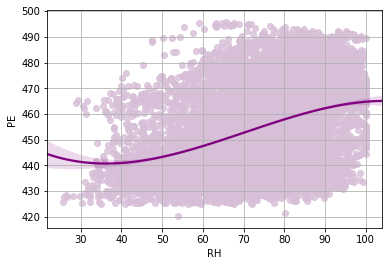

In [31]:
import seaborn as sns
scat1=sns.regplot(x="RH",y="PE",order=3,data=d1,scatter_kws={"color": "thistle"},line_kws={"color": "purple"})
scat1.grid(True)
plt.xlabel("RH")
plt.ylabel("PE")
reg1=smf.ols('PE~RH+I(RH ** 2)+I(RH ** 3)',data=d1).fit()
print(reg1.summary())

## R-squared is 15.4%, and P-values for all terms is 0.0 showing statistical significance but the R-squared is lesser than that for AP and V and AT

# g) Linear regression model with all pairwise interaction terms

In [32]:
model=smf.ols(formula='PE~AT+AP+V+RH+(AT:V)+(AT:AP)+(AT:RH)+(V:AP)+(V:RH)+(AP:RH)',data=d1)
output=model.fit()

print(output.summary())  

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:39:52   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

## From the above summary we see that, the statistically significant terms are: AT,  AP, V, RH, AT:V, AT:RH, V:AP, AP:RH as they have P-value less than 0.05.
## The insignificant terms are: AT:AP, V:RH since they have P-value greater than 0.05

# h)Train the regression model on a randomly selected 70% subset of the data with all predictors.
# Report your train and test MSEs.

In [33]:
import sklearn.cross_validation
from sklearn.model_selection import train_test_split
all_pred=d1.drop(d1.columns[[4]],axis=1)
#print(all_pred)
X_train, X_test, y_train, y_test = train_test_split(all_pred, pe, test_size=0.30, random_state=1)
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

c = regression_model.intercept_[0]
print("The intercept for our model is {}".format(c))

from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
mse = mean_squared_error(y_predict, y_test)
print("MSE for test =",mse)
y_predict1 = regression_model.predict(X_train)
mse1 = mean_squared_error(y_predict1, y_train)
print("MSE for train =",mse1)

The coefficient for AT is -1.9665926721785363
The coefficient for V is -0.23777511667777215
The coefficient for AP is 0.06237168862081986
The coefficient for RH is -0.15905624041424896
The intercept for our model is 454.4112229708391
MSE for test = 21.362379894606455
MSE for train = 20.517980736490596


C:\Users\milon\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Run a regression model involving all possible interaction terms and quadratic nonlinearities,and remove insignificant variables using p-values
# Report your train and test MSEs

In [34]:
import sklearn.cross_validation
from sklearn.model_selection import train_test_split
all_pred=d1.drop(d1.columns[[4]],axis=1)
#print(all_pred)
X_train, X_test, y_train, y_test = train_test_split(all_pred, pe, test_size=0.30, random_state=1)
d=X_train.join(y_train)

print("regression model involving all possible interaction terms and quadratic nonlinearities")
model=smf.ols(formula='PE~(AT*V)+(AT*AP)+(AT*RH)+(V*AP)+(V*RH)+(AP*RH)+I(AT**2)+I(V**2)+I(AP**2)+I(RH**2)',data=d)
output=model.fit()
print(output.summary(),"\n")

print("We get P value as 0.549 for V**2, so we remove it from the model\n")
model1=smf.ols(formula='PE~(AT*V)+(AT*AP)+(AT*RH)+(V*AP)+(V*RH)+(AP*RH)+I(AT**2)+I(AP**2)+I(RH**2)',data=d)
op1=model1.fit()
print(op1.summary(),"\n")

print("We get P value as 0.536 for V:RH, so we remove it from the model\n")
model2=smf.ols(formula='PE~(AT*V)+(AT*AP)+(AT*RH)+(V*AP)+(AP*RH)+I(AT**2)+I(AP**2)+I(RH**2)',data=d)
op2=model2.fit()
print(op2.summary(),"\n")

print("We get P value as 0.233 for AT:AP, so we remove it from the model\n")
model3=smf.ols(formula='PE~(AT*V)+(AT*RH)+(V*AP)+(AP*RH)+I(AT**2)+I(AP**2)+I(RH**2)',data=d)
op3=model3.fit()
print(op3.summary(),"\n")
predx=op3.predict(X_test)
#print(predx)
from sklearn.metrics import mean_squared_error
print("The MSE for tresting is=",mean_squared_error(y_test,predx))
print("The MSE for training is=",op3.mse_resid)

regression model involving all possible interaction terms and quadratic nonlinearities
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7269.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:40:18   Log-Likelihood:                -19130.
No. Observations:                6697   AIC:                         3.829e+04
Df Residuals:                    6682   BIC:                         3.839e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

# After Backward Selection
**We are left with 11 terms which give us an optimal model where all P values for the terms are 0.0 **<br>
The following are the relevant terms:<br> 
1. AT<br>
2. V<br>
3. AT:V<br>
4. RH<br>
5. AT:RH<br>
6. AP<br>
7. V:AP<br>
8. AP:RH<br>
9. $AT^2$<br>
10. $AP^2$<br>
11. $RH^2$ <br>

# i) KNN Regression
# For Raw Features

MAXIMUM SCORE= 1.0
For training best fit is given by k= 1
For training best fit using error is given by k= 1
For testing best fit is given by k= 5
For testing best fit using error is given by k= 5
MSE= 15.63838109230233


<Figure size 432x288 with 0 Axes>

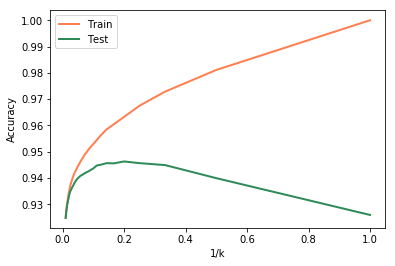

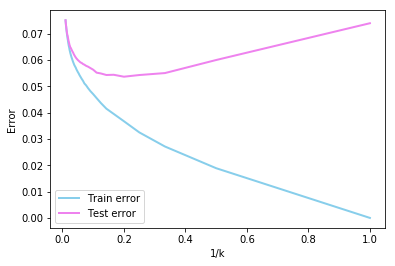

<Figure size 432x288 with 0 Axes>

In [35]:
import sklearn.cross_validation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
all_pred=d1.drop(d1.columns[[4]],axis=1)
#print(all_pred)
kloop=[]
score=[]
score1=[]
k1=[]
mse=[]
mse1=[]
e=[]
e1=[]
X_train, X_test, y_train, y_test = train_test_split(all_pred, pe, test_size=0.30, random_state=100)
from sklearn.neighbors import KNeighborsRegressor
for k in range(1,100,1):
    kloop.append(k)
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    score.append(neigh.score(X_train,y_train))
    e.append(1-neigh.score(X_train,y_train))
    
    pred=neigh.predict(X_train) 
    error = (mean_squared_error(y_train,pred)) 
    mse.append(error)
    
    
    n1= KNeighborsRegressor(n_neighbors=k)
    n1.fit(X_train, y_train)
    score1.append(n1.score(X_test,y_test))
    e1.append(1-n1.score(X_test,y_test))
    
    pred1=n1.predict(X_test) 
    error1 = (mean_squared_error(y_test,pred1)) 
    mse1.append(error1)
    
    k1.append((1/k))
    
k_score=max(score)
print("MAXIMUM SCORE=",k_score)
k_error=min(mse)
mink_score=score.index(k_score)
mink_error=mse.index(k_error)
print("For training best fit is given by k=",kloop[mink_score])
print("For training best fit using error is given by k=",kloop[mink_error])

k_score1=max(score1)
k_error1=min(mse1)
mink_score1=score1.index(k_score1)
mink_error1=mse1.index(k_error1)
print("For testing best fit is given by k=",kloop[mink_score1])
print("For testing best fit using error is given by k=",kloop[mink_error1])

n= KNeighborsRegressor(n_neighbors=kloop[mink_score1])
n.fit(X_train, y_train)
p=n.predict(X_test)
ee= (mean_squared_error(y_test,p))
print("MSE=",ee)    
plt.plot(k1, score, linewidth=2.0,color="coral",label="Train")
plt.plot(k1, score1, linewidth=2.0,color="seagreen",label="Test")
plt.xlabel("1/k")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()
plt.plot(k1, e, linewidth=2.0,color="skyblue",label="Train error")


plt.plot(k1, e1, linewidth=2.0,color="violet",label="Test error")
plt.xlabel("1/k")
plt.ylabel("Error")
plt.legend()
plt.figure()
#print(mse)


# For Normalized Features

For training best fit is given by k= 1
For training best fit using error is given by k= 1
For testing best fit is given by k= 4
For testing best fit using error is given by k= 4


<Figure size 432x288 with 0 Axes>

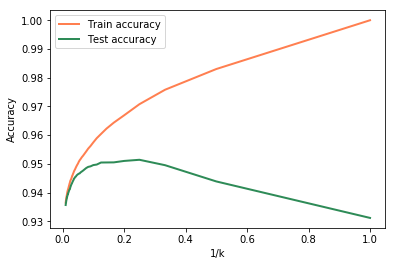

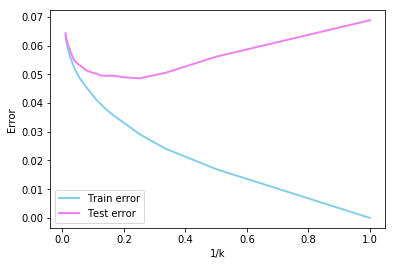

<Figure size 432x288 with 0 Axes>

In [36]:
from sklearn import preprocessing
import sklearn.cross_validation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as p
all_pred=d1.drop(d1.columns[[4]],axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
normal_pred = min_max_scaler.fit_transform(all_pred)
normal_pe=min_max_scaler.fit_transform(pe)

#normal_pred=preprocessing.normalize(all_pred)
#normal_pe=preprocessing.normalize(pe)

#print(normal_pred)
#print(all_pred)
kloop=[]
score=[]
score1=[]
k1=[]
mse=[]
mse1=[]
e=[]
e1=[]
X_train, X_test, y_train, y_test = train_test_split(normal_pred, normal_pe, test_size=0.30, random_state=100)
from sklearn.neighbors import KNeighborsRegressor
for k in range(1,100,1):
    kloop.append(k)
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    score.append(neigh.score(X_train,y_train))
    e.append(1-neigh.score(X_train,y_train))
    
    pred=neigh.predict(X_train) 
    error = (mean_squared_error(y_train,pred)) 
    mse.append(error)
    
    
    n1= KNeighborsRegressor(n_neighbors=k)
    n1.fit(X_train, y_train)
    score1.append(n1.score(X_test,y_test))
    e1.append(1-n1.score(X_test,y_test))
    
    pred1=n1.predict(X_test) 
    error1 = (mean_squared_error(y_test,pred1)) 
    mse1.append(error1)
    
    k1.append((1/k))
    
k_score=max(score)
k_error=min(mse)
mink_score=score.index(k_score)
mink_error=mse.index(k_error)
print("For training best fit is given by k=",kloop[mink_score])
print("For training best fit using error is given by k=",kloop[mink_error])

k_score1=max(score1)
k_error1=min(mse1)
mink_score1=score1.index(k_score1)
mink_error1=mse1.index(k_error1)
print("For testing best fit is given by k=",kloop[mink_score1])
print("For testing best fit using error is given by k=",kloop[mink_error1])

    
p.plot(k1, score, linewidth=2.0,color="coral",label="Train accuracy")
p.plot(k1, score1, linewidth=2.0,color="seagreen",label="Test accuracy")
p.xlabel("1/k")
p.ylabel("Accuracy")
p.legend()
p.figure()

p.plot(k1, e, linewidth=2.0,color="skyblue",label="Train error")
p.plot(k1, e1, linewidth=2.0,color="violet",label="Test error")
p.xlabel("1/k")
p.ylabel("Error")
p.legend()
p.figure()


# j) Compare the results of KNN Regression with linear regression.
## We get MSE for Linear Regression using all predictors(AT,V,AP,RH) as 21.36 
## We get MSE for KNN Regression (raw features) as 15.63
## Thus, we can say that KNN Regression runs better than Linear Regression in our case.

# ISLR: 2.4.1
(a) The sample size n is extremely large, and the number of predictors p is small.

BETTER-Due to the large sample size, flexible statistical learning method would perform better as we need to fit more parameters

(b) The number of predictors p is extremely large, and the number of observations n is small.

WORSE-Flexible statistical learning will perform worse than inflexible because overfitting will take place as number of observations is small

(c) The relationship between the predictors and response is highly non-linear.

BETTER- Due to the high non-linearity, a complex model will be required to fit the data properly requiring more parameters to fit the data

(d) The variance of the error terms, i.e. σ2 = Var(e), is extremely high.

WORSE-The flexible model will tend to overfit the data, resulting in less accuracy

# ISLR: 2.4.7

In [37]:
o1=(0,3,0)
o2=(2,0,0)
o3=(0,1,3)
o4=(0,1,2)
o5=(-1,0,1)
o6=(1,1,1)
x=(0,0,0)

a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [38]:
from scipy.spatial import distance
d1 = distance.euclidean(x,o1)
print("Between o1 and x=",d1)
d2 = distance.euclidean(x,o2)
print("Between o2 and x=",d2)
d3 = distance.euclidean(x,o3)
print("Between o3 and x=",d3)
d4 = distance.euclidean(x,o4)
print("Between o4 and x=",d4)
d5 = distance.euclidean(x,o5)
print("Between o5 and x=",d5)
d6 = distance.euclidean(x,o6)
print("Between o6 and x=",d6)

Between o1 and x= 3.0
Between o2 and x= 2.0
Between o3 and x= 3.1622776601683795
Between o4 and x= 2.23606797749979
Between o5 and x= 1.4142135623730951
Between o6 and x= 1.7320508075688772


b) What is our prediction with K = 1? Why?

When K=1, the closest one neighbour for point x is o5 (-1,0,1) since minimum euclidean distance is there between them.
Prediction is GREEN

c) What is our prediction with K = 3? Why?

When K=3, the 3 nearest neighbours are o5,o6 and o2 having euclidean distances of 1.414,1.732 and 2.0 respectively.
Prediction is RED because o6 and o2 have colour Red where as only o5 has colour Green

d) If the Bayes decision boundary in this problem is highly nonlinear,then would we expect the best value for K to be large or small? Why?

In order to capture more of the non-linearity of the decision boundary, the value of K should be SMALL.